# EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE DOENÇA CARDÍACA
Base de dados tirada do Kaggle: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
dados_df = pd.read_csv('Churn_Modelling.csv', sep = ',')

In [32]:
dados_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
dados_df.shape

(10000, 14)

In [34]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber: Identificador único para cada registro, não irá contribuir para a análise.

CustomerId: identificador único para cada cliente.

Surname: Sobrenome de cada cliente.

CreditScore: crédito de um cliente com base em seu histórico de crédito e comportamento financeiro.

Geography: Pais onde cada cliente mora.

Gender: Gênero do cliente(Feminino ou Masculino)

Age: Idade do clientes

Tenure: Quantidade de tempo que o cliente está com o banco.

Balance: O saldo co cliente, ou seja a quantidade de dinheiro na conta bancária .

NumOfProducts: Pode incluir várias ofertas, como contas de poupança, empréstimos, cartões de crédito, entre outros.

HasCrCard: Usada para identificar se o cliente tem ou não cartão de crédito com (1) para caso ele possua, e (0) caso contrario.

IsActiveMember: Indica se o cliente é membro ativo (1) ou não (0) dentro do banco.

EstimatedSalary: Fornece uma aproximação do nível de renda do cliente.

Exited: Indica se um cliente cancelou (1) ou não (0) do banco.

Verificando se o Dataframe contém campos vazios

## Limpeza e tratamento dos dados

### Análises Estatísticas Descritivas

In [35]:
dados_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [36]:
dados_df.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Valores Missing (NAN)

In [37]:
dados_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Analisando valores duplicados

In [38]:
dados_df.duplicated().sum()

0

### Análise dos Outliers

In [39]:
px.box(dados_df, x = 'CreditScore')

In [40]:
px.box(dados_df, x = 'Age')

In [41]:
px.box(dados_df, x = 'Tenure')

In [42]:
px.box(dados_df, x = 'Balance')

In [43]:
px.box(dados_df, x = 'EstimatedSalary')

Existem clientes com sálarios muito baixos em torno de 11,58 Euros, valores esses que podem ter sido preenchidos por engano, por causa de algum erro de digitação, por isso devemos tratar esses valores

### Tratando valores nos sálarios estimados

Irei considerar que os salários abaixo de 1300 Euros estão incorretos.

In [44]:
dados_df[dados_df['EstimatedSalary']<1300]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
149,150,15794413,Harris,416,France,Male,32,0,0.00,2,0,1,878.87,0
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0
393,394,15684548,Demidov,556,Spain,Male,38,8,0.00,2,0,0,417.41,1
396,397,15584766,Knight,557,France,Male,33,3,54503.55,1,1,1,371.05,0
559,560,15571816,Ritchie,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636,9637,15613048,Anderson,648,Germany,Female,40,5,139973.65,1,1,1,667.66,1
9647,9648,15679693,Walker,625,France,Male,31,5,0.00,2,0,1,90.07,0
9649,9650,15788025,Tseng,715,France,Female,38,0,0.00,2,1,1,332.81,0
9875,9876,15747130,Tsao,521,France,Male,39,7,0.00,2,0,1,653.58,0


In [45]:
dados_filtrados = dados_df[dados_df['EstimatedSalary'] > 1500]

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

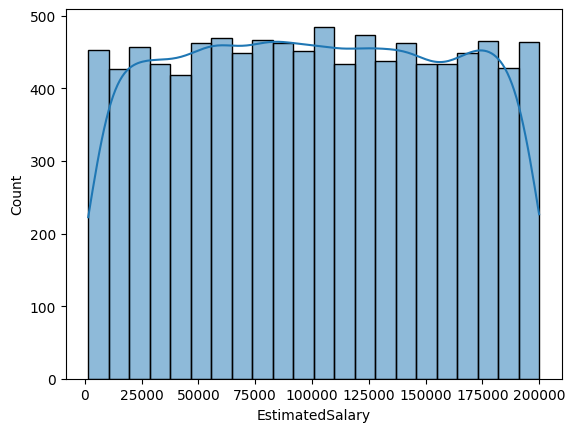

In [46]:
sns.histplot(dados_filtrados, x = 'EstimatedSalary', kde=True)

Como os salários seguem uma distribuição uniforme, irei substituir os valores de salários abaixo de 1300 Euros pela Mediana dos salários.

In [47]:
dados_filtrados['EstimatedSalary'].median()

100919.19

In [48]:
# Substituindo os valores informados pela mediana
dados_df.loc[dados_df['EstimatedSalary'] < 1300, 'EstimatedSalary'] = dados_filtrados['EstimatedSalary'].median()

In [49]:
dados_df[dados_df['EstimatedSalary']<1300]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [50]:
px.box(dados_df, x = 'EstimatedSalary')

## EDA

Iremos realizar uma análise exploratória dos dados para entender melhor o que esta acontecendo.

### Churn

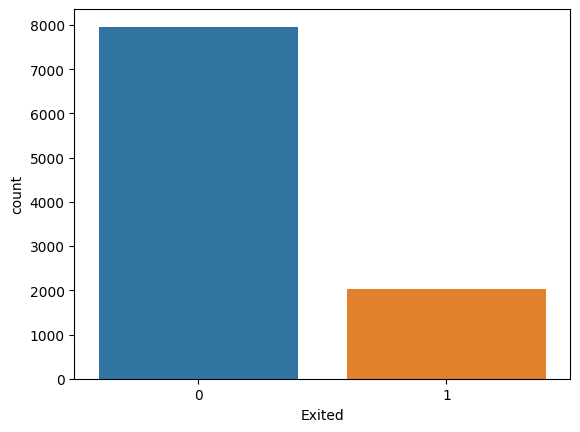

In [51]:
sns.countplot(dados_df, x = 'Exited');

### Gênero

In [52]:
px.pie(dados_df, 'Gender')

In [53]:
churn_genero = dados_df.groupby(['Gender', 'Exited']).size().unstack()
churn_genero

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


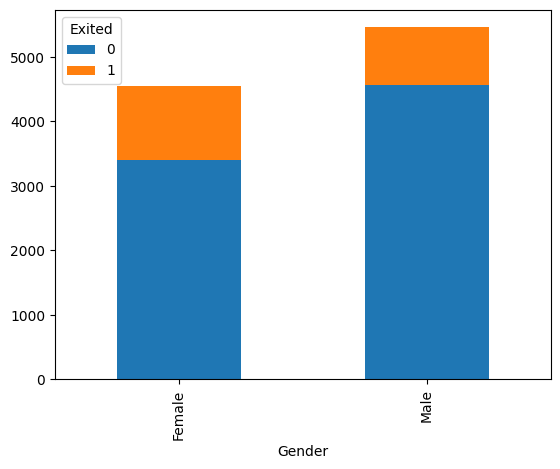

In [54]:
# Crie o gráfico de colunas empilhadas
churn_genero.plot(kind='bar', stacked=True);

###País

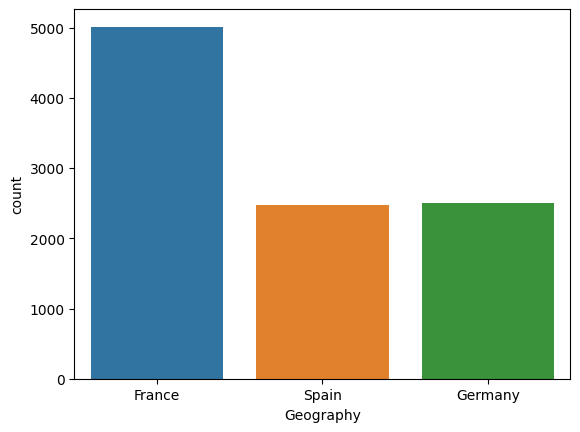

In [55]:
sns.countplot(dados_df, x = 'Geography');

In [56]:
churn_pais = dados_df.groupby(['Geography', 'Exited']).size().unstack()
churn_pais

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


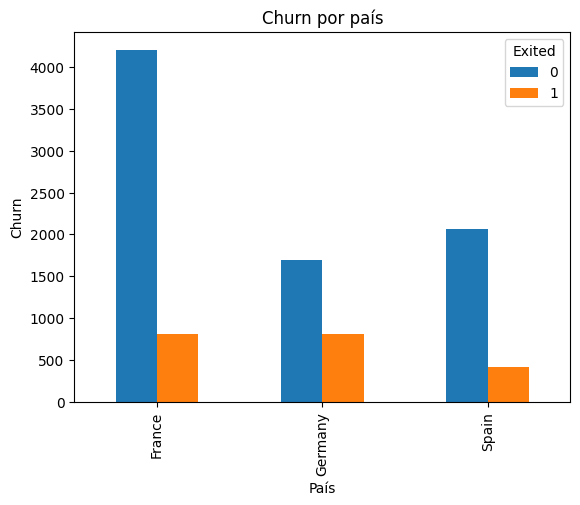

In [57]:
churn_pais.plot(kind = 'bar')
plt.title('Churn por país')
plt.ylabel('Churn')
plt.xlabel('País')
plt.show()

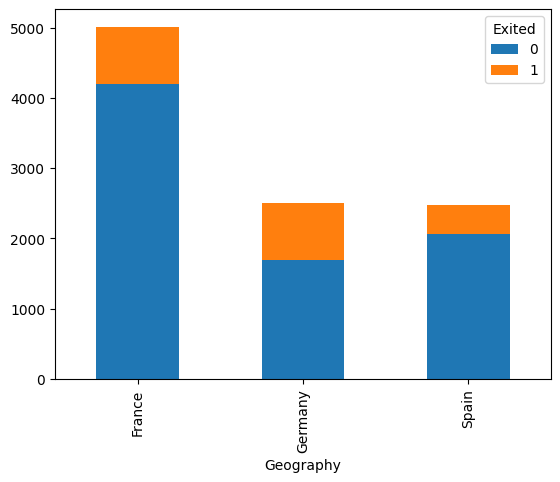

In [58]:
churn_pais.plot(kind='bar', stacked = True);

Podemos notar que a Alemanha é o pais que mais se perde clientes em relação aquantidade total de clientes, deve ser averiguado o motivo da perca de tantos clientes alemães.

### Idade

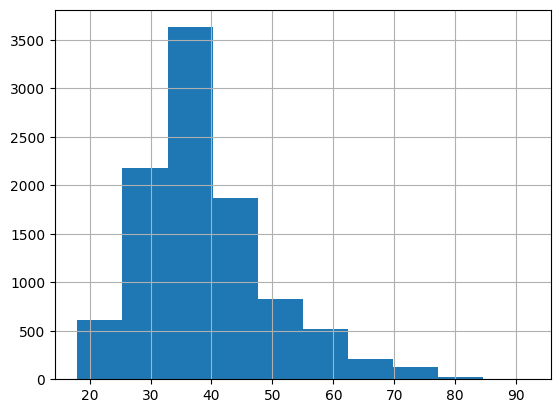

In [59]:
dados_df.Age.hist();

Criando um novo Dataframe igual o original, para fazer algumas alterações, sem modificar o principal, onde será analisado o churn por intervalos de idade dos clientes.

In [60]:
dados1 = dados_df.copy()

In [61]:
idades = pd.unique(dados1.Age)
idades.sort()
print(idades)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 92]


In [62]:
dados1['Age'] = pd.cut(dados1['Age'], bins=range(15,95,5))

In [63]:
idade_churn = dados1.groupby(['Age','Exited']).size().unstack()
idade_churn

Exited,0,1
Age,,
"(15, 20]",84,5
"(20, 25]",481,41
"(25, 30]",1255,102
"(30, 35]",1986,199
"(35, 40]",1927,339
"(40, 45]",1076,394
"(45, 50]",456,394
"(50, 55]",192,269
"(55, 60]",157,179


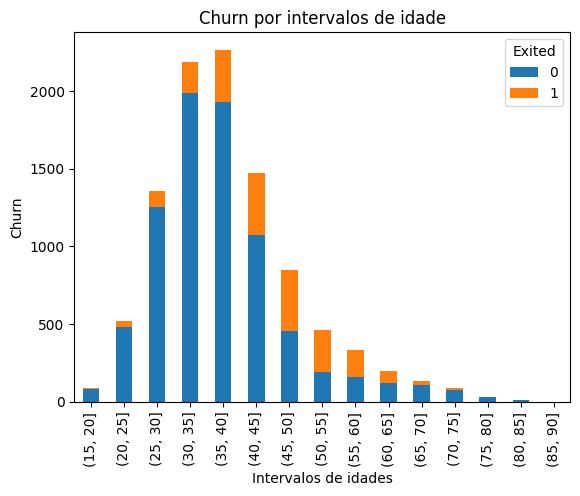

In [64]:
idade_churn.plot(kind='bar', stacked = True)
plt.title('Churn por intervalos de idade')
plt.ylabel('Churn')
plt.xlabel('Intervalos de idades')
plt.show()

è possivel perceber que os clientes que mais fazem o Churn estão distribuidos entre as idades de 35 e 60 anos.

###Tempo que é cliente do banco

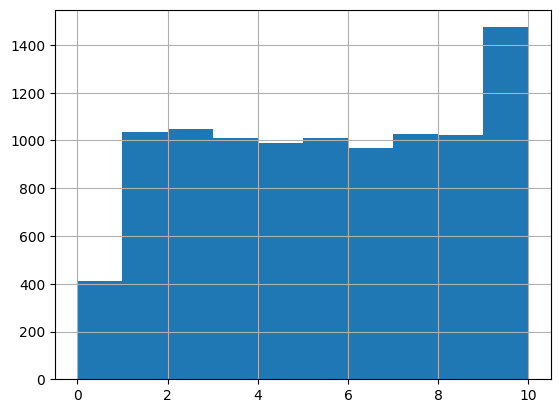

In [65]:
dados_df.Tenure.hist();

In [66]:
dadostenure = dados_df.copy()

In [67]:
Tcliente = np.unique(dadostenure.Tenure)
Tcliente.sort()
print(Tcliente)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [68]:
Tcliente_churn = dados1.groupby(['Tenure','Exited']).size().unstack()
Tcliente_churn

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


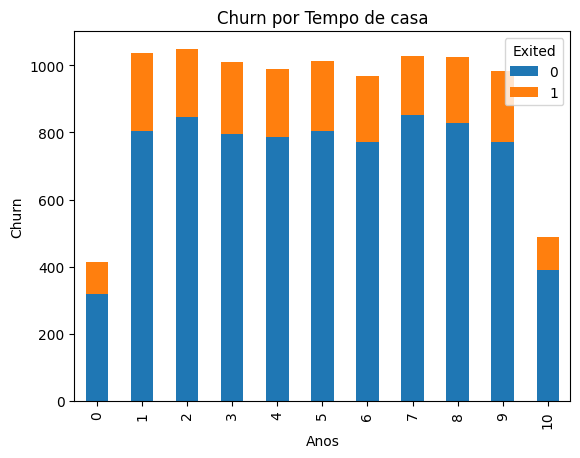

In [69]:
Tcliente_churn.plot(kind='bar', stacked = True)
plt.title('Churn por Tempo de casa')
plt.ylabel('Churn')
plt.xlabel('Anos')
plt.show()

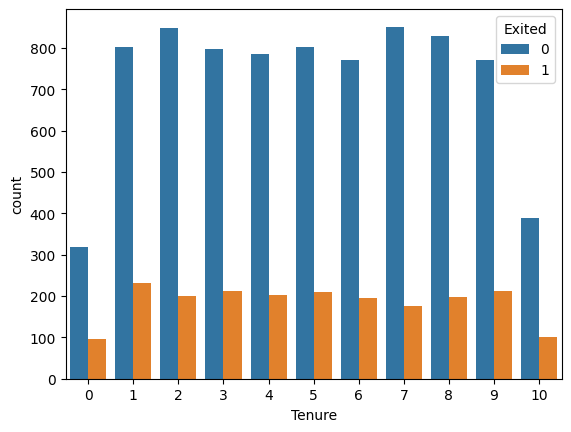

In [70]:
sns.countplot(x = dados_df.Tenure, hue = dados_df.Exited);

Como podemos notar nos gráficos, os clientes não apresentam uma tendencia a sair da empresa quando passam mais tempo sendo clientes.

### Saldo Bancário

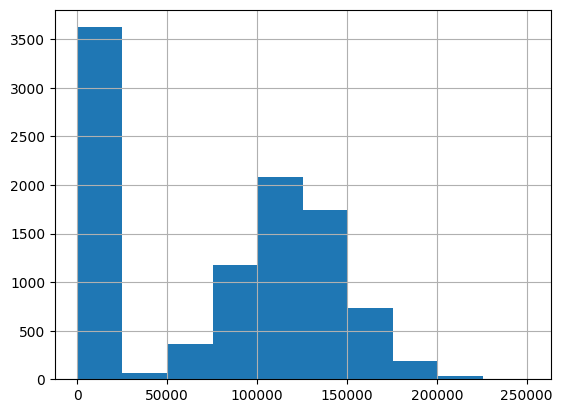

In [71]:
dados_df.Balance.hist();

In [72]:
dadosbalance = dados_df.copy()

In [73]:
Bcliente = np.unique(dadostenure.Balance)
Bcliente.sort()
print(Bcliente)

[     0.     3768.69  12459.19 ... 222267.63 238387.56 250898.09]


In [74]:
dadosbalance['Balance'] = pd.cut(dadosbalance['Balance'], bins=range(0,275000,25000))

In [75]:
churn_balance = dadosbalance.groupby(['Balance','Exited']).size().unstack()
churn_balance

Exited,0,1
Balance,,
"(0, 25000]",2,4
"(25000, 50000]",47,22
"(50000, 75000]",274,75
"(75000, 100000]",935,225
"(100000, 125000]",1510,558
"(125000, 150000]",1333,429
"(150000, 175000]",582,156
"(175000, 200000]",148,49
"(200000, 225000]",15,17


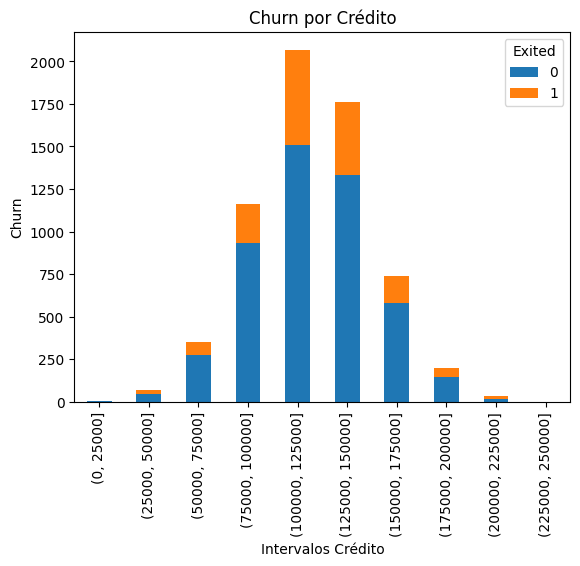

In [76]:
churn_balance.plot(kind='bar', stacked = True)
plt.title('Churn por Crédito')
plt.ylabel('Churn')
plt.xlabel('Intervalos Crédito')
plt.show()

Os clientes com um saldo bancario entre 100000 e 150000, são os que mais realizam Churn no banco.

### Número de produtos

In [77]:
dados_df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

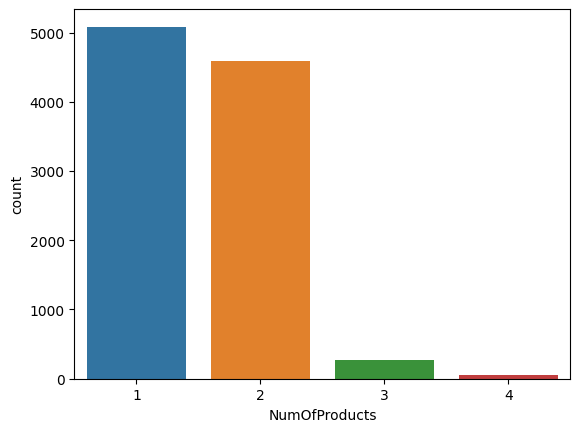

In [78]:
sns.countplot(dados_df, x = 'NumOfProducts');

In [79]:
churn_produtos = dados_df.groupby(['NumOfProducts','Exited']).size().unstack()
churn_produtos

Exited,0,1
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


Já podemos notar na Tabela que todos os clientes com de 4 servoços prestados pelo banco, já efetuaram o Churn.

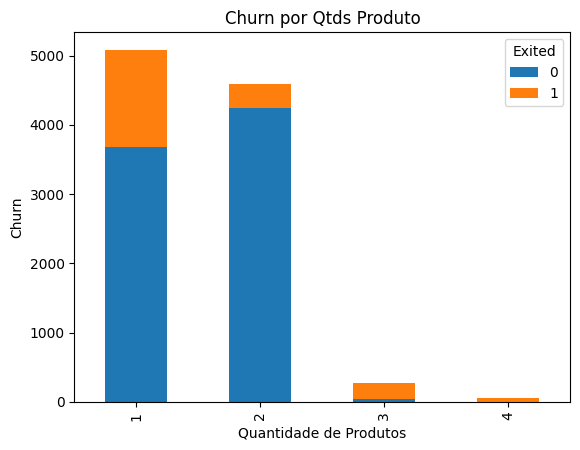

In [80]:
churn_produtos.plot(kind='bar', stacked = True)
plt.title('Churn por Qtds Produto')
plt.ylabel('Churn')
plt.xlabel('Quantidade de Produtos')
plt.show()

A partis das informações coletadas na análise, é possivel perceber que todos os clientes com quatro serviços do banco e quase todos com 3 serviços realizaram o churn, também é importante observar que muitos clientes que só usam um serviço estão deixando de ser clientes, casos esses que devem ser averiguados.

###Cartão de Crédito

In [81]:
px.pie(dados_df, 'HasCrCard')

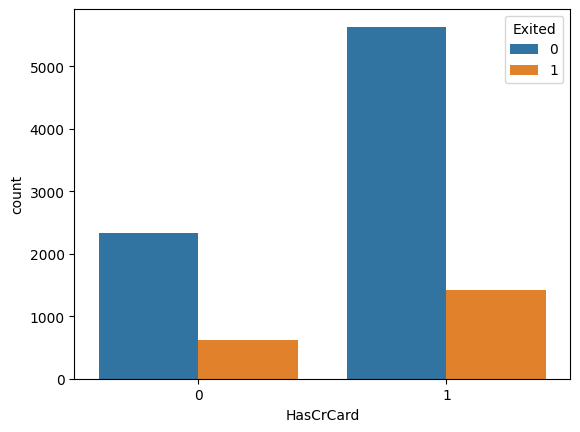

In [82]:
sns.countplot(x = dados_df.HasCrCard, hue = dados_df.Exited);

Podemos notar que o cliente ter ou não cartão de crédito, irá influenciar na decisão de sair da empresa.

###Cliente Ativo

In [83]:
px.pie(dados_df, 'IsActiveMember')

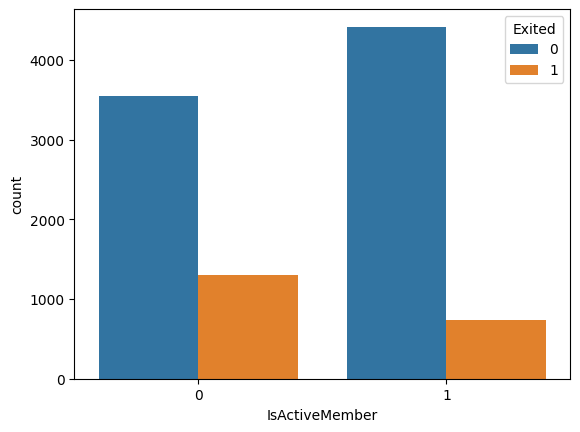

In [84]:
sns.countplot(x = dados_df.IsActiveMember, hue = dados_df.Exited);

Pelo gráfico podemos perceber que clientes que não são ativos, apresentam mais chances de desativar sua conta no banco.

### Salário estimado dos clientes

<Axes: >

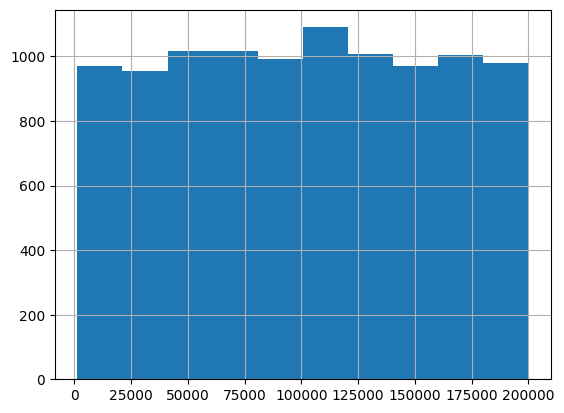

In [85]:
dados_df.EstimatedSalary.hist()

In [86]:
dadossalario = dados_df.copy()

In [87]:
salarios = np.unique(dadostenure.EstimatedSalary)
salarios.sort()
salarios.min(), salarios.max()

(1351.41, 199992.48)

In [88]:
dadossalario['EstimatedSalary'] = pd.cut(dadossalario['EstimatedSalary'], bins = range(0,200000, 20000))

In [89]:
salario_churn = dadossalario.groupby(['EstimatedSalary','Exited']).size().unstack()
salario_churn

Exited,0,1
EstimatedSalary,,
"(0, 20000]",729,181
"(20000, 40000]",773,196
"(40000, 60000]",815,191
"(60000, 80000]",815,212
"(80000, 100000]",806,196
"(100000, 120000]",875,228
"(120000, 140000]",811,196
"(140000, 160000]",776,206
"(160000, 180000]",784,225


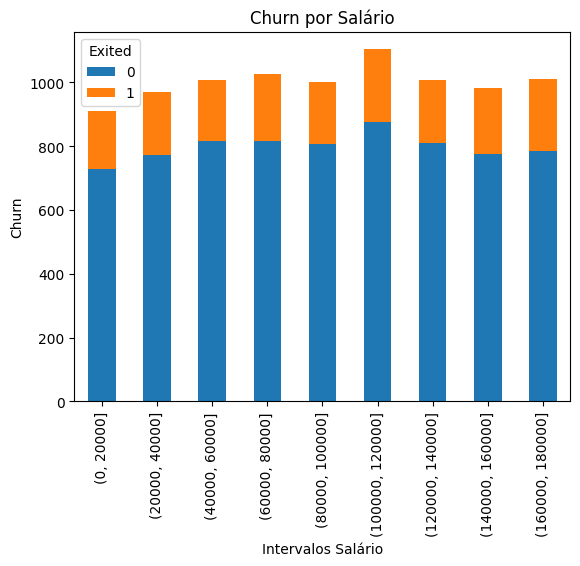

In [90]:
salario_churn.plot(kind='bar', stacked = True)
plt.title('Churn por Salário')
plt.ylabel('Churn')
plt.xlabel('Intervalos Salário')
plt.show()

Como podemos notar o salário do clientes não influencia em sua decisão de saida do banco.

### Mapa de Calor

In [91]:
dados_selecionados = dados_df[['Exited', 'NumOfProducts', 'Balance', 'Tenure', 'Age']]

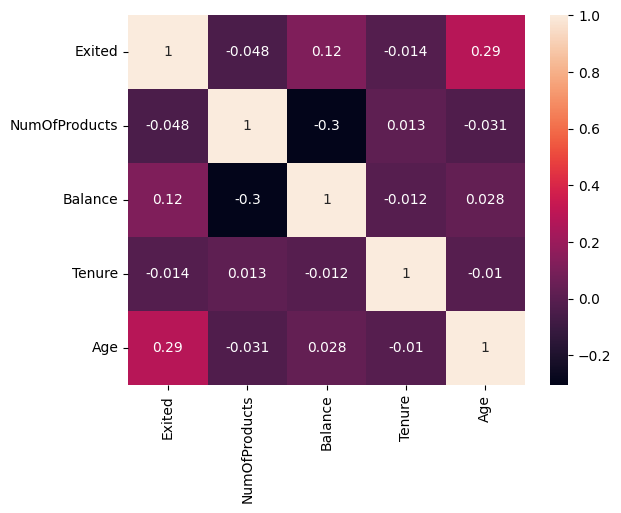

In [92]:
sns.heatmap(dados_selecionados.corr(), annot=True);

Nenhuma das variáveis númericas apresentam uma forte correlação com o Churn

## Salvando (Exportando) o Dataframe Tratado

In [93]:
dados_df.to_csv('Churn_Modelling_Tratado.csv', sep=';', encoding='utf-8', index = False)